# Bias and Variance

## Overview
> * Objective 01 - Understand the Metrics used in model evaluation
> * Objective 02 - Define and determine variance
> * Objective 03 - Differentiate overfit vs underfit models
> * Objective 04 - Consider the bias/variance tradeoff in linear regression

Throughout this week, we've learned:
- How to use OLS to fit a model 
- How to determine the correlation between independent features. 

One thing we haven't discussed is how to measure the performance of a regression model. 
- The assumptions of a linear regression models and how to assess their validity. 
- What makes a good model? 
- What makes a bad model? 
- Between two models, which should we pick and why? 


### The Process of Data Science

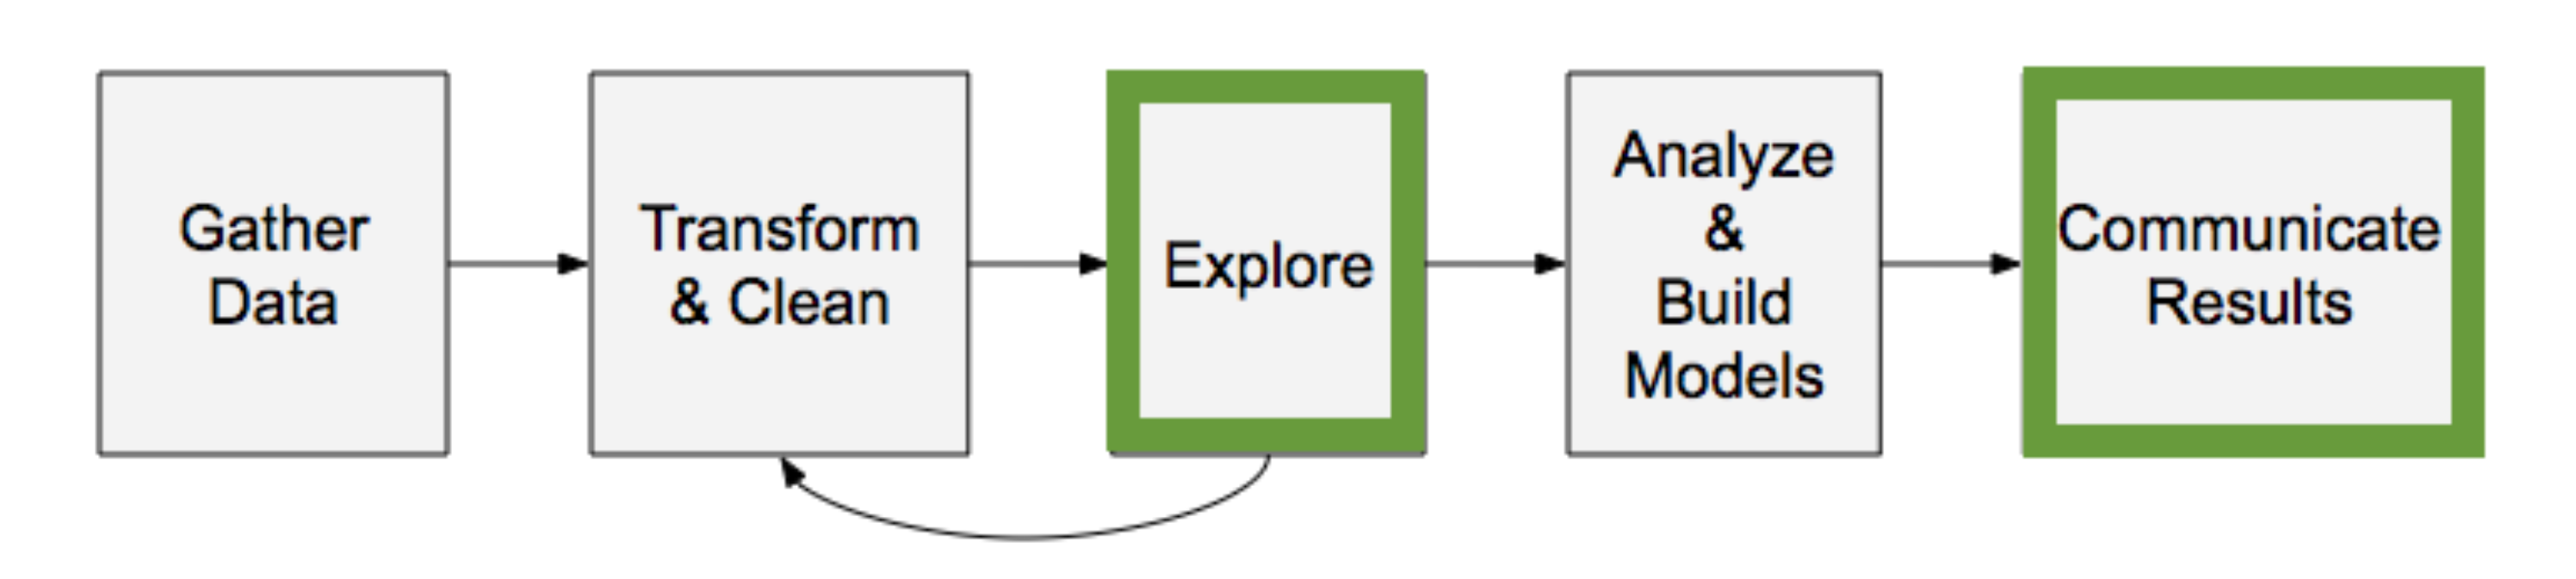

> As part of communicating results, we are also reporting our model's evaluations. In other words, once we build our models, we want to be able to [evaluate their performance](https://scikit-learn.org/stable/modules/model_evaluation.html).

## Regression Metrics

When you build a machine learning model, you are teaching a model to learn the given data and generate predictions based on the pattern observed during the learning process. 

We can always choose to continue improving our model, based on the results we get. We can quantify a model's performance using metrics. 


There are many different metrics we can use. The most commonly used are **MSE**, **RMSE** and **$R^2$** 
- Mean Squared Error
- Root Mean Squared Error
- Median and Mean Absolute Error
- $R^2$


We use metrics to evaluate the quality of our model performance. This can get tricky when we have to maintain the flexibility of the model to account for new variables, without compromising on the correctness of the model.

In [139]:
import seaborn as sns
sns.get_dataset_names()
autos = sns.load_dataset('mpg')

In [140]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [143]:
autos.head() 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


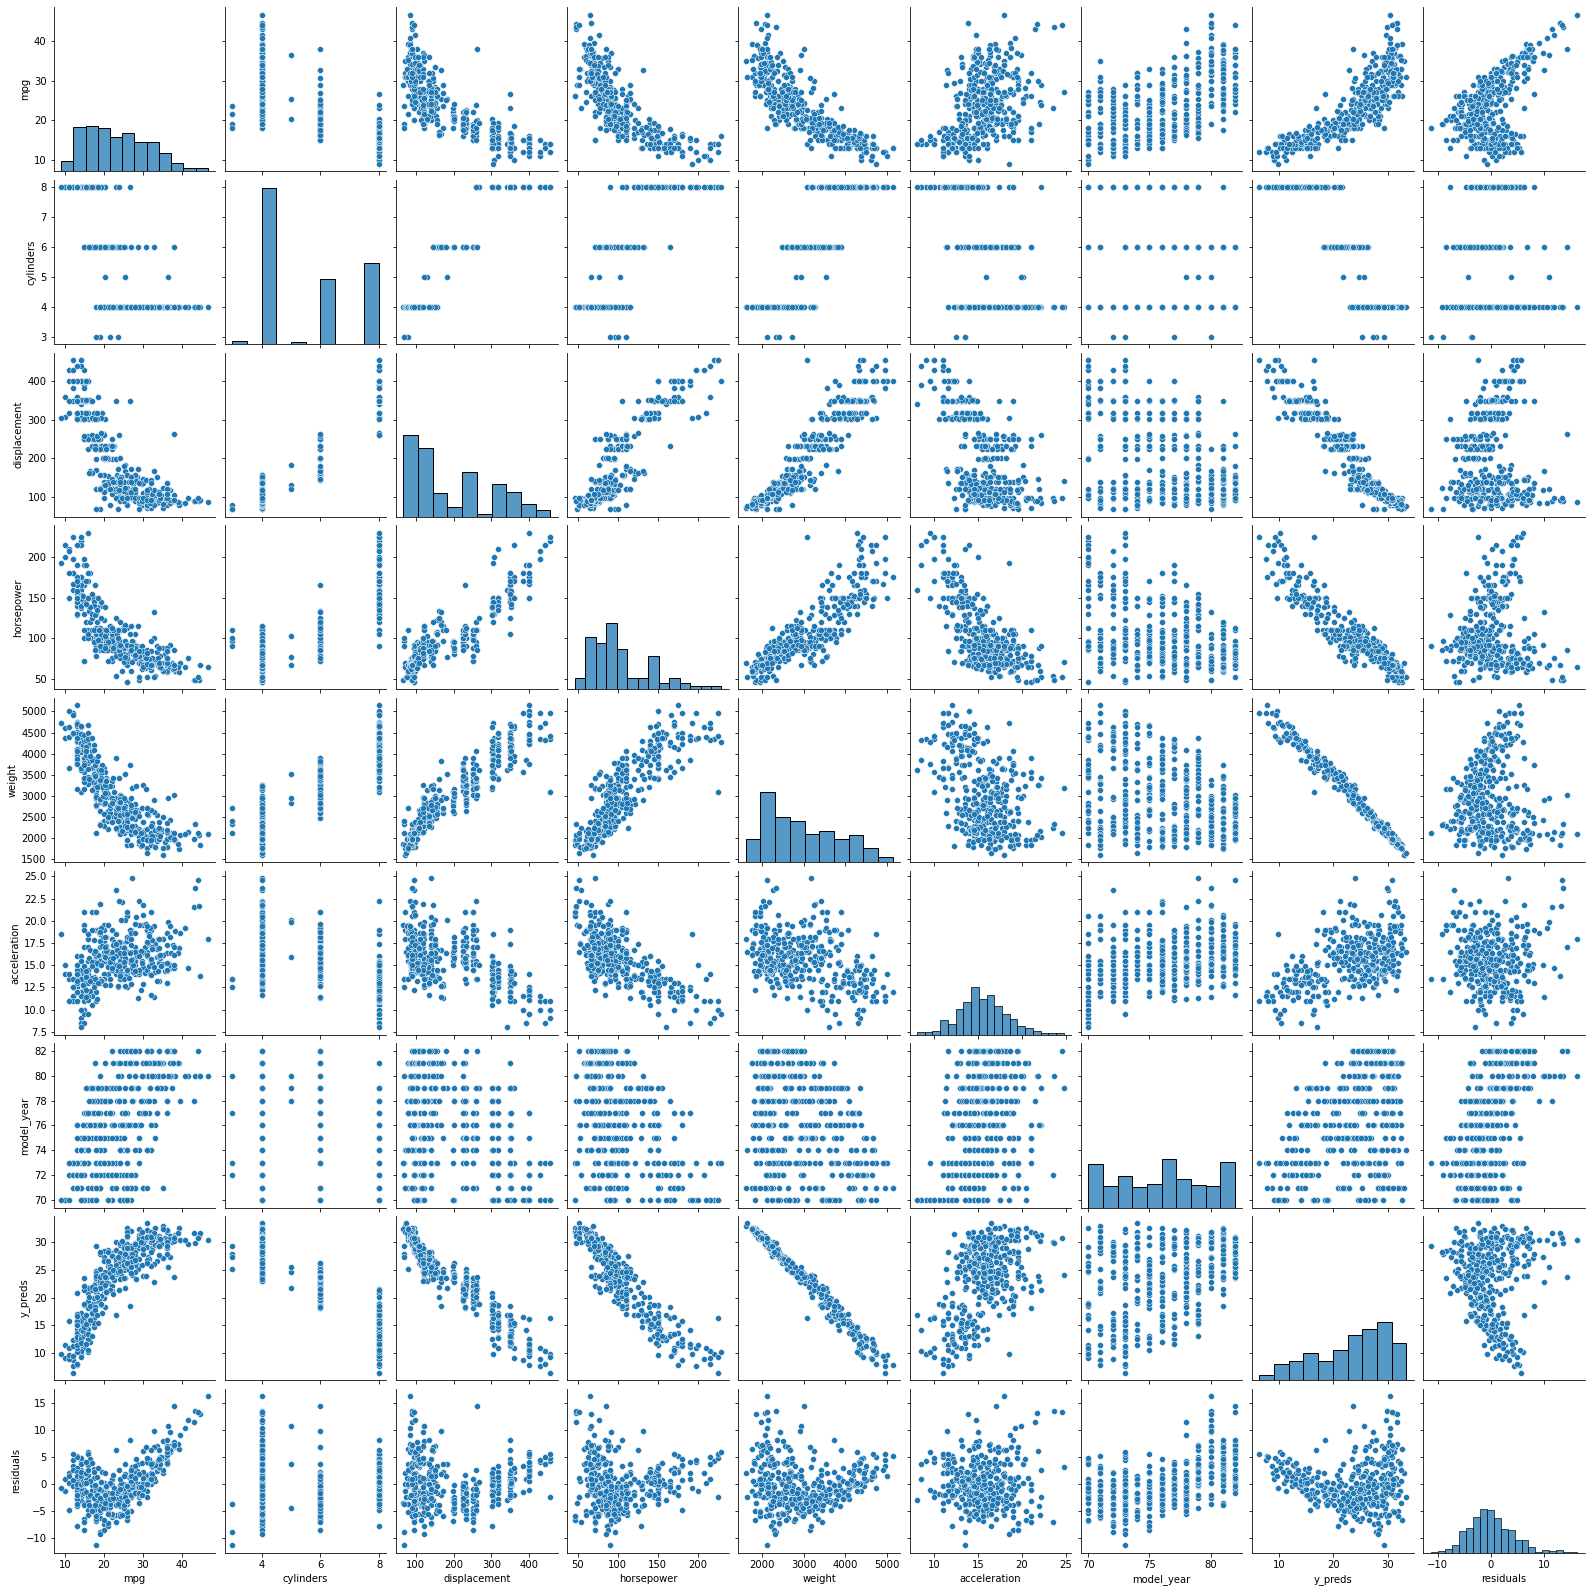

In [185]:
sns.pairplot(autos)

In [191]:
model = ols('mpg ~ displacement  + horsepower + weight', data= autos).fit()
print(model.summary())
autos['y_preds'] = model.predict(autos[['displacement', 'horsepower', 'weight']])

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     312.0
Date:                Mon, 24 Jan 2022   Prob (F-statistic):          5.10e-103
Time:                        10:49:40   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2249.
Df Residuals:                     388   BIC:                             2265.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       44.8559      1.196     37.507   

In [145]:

autos['residuals'] = autos['mpg'] - autos['y_preds']

###  Four Assumptions of Linear Regression
(This may come up in interviews) 

1. Linear relationship: There exists a linear relationship between the independent variable, x, and the dependent variable, y.

2. Independence: The residuals are independent. In particular, there is no correlation between consecutive residuals in time series data.

3. Homoscedasticity: The residuals have constant variance at every level of x.

4. Normality: The residuals of the model are normally distributed.

[Source](https://www.statology.org/linear-regression-assumptions/)

## Metrics

We use metrics to evaluate the quality of the our predictions produced by our models. Since our focus this week is on regression, the things we look at are: 

### Residual *****


residual = true value - predicted value \
or 
### $(y - \hat{y})$

### Absolute Error ****


If describing our error amount is a priority, or you want get the exact unit of value from your predictions, you measure absolute error.

*Remember: over prediction vs under predition with your residual values*


#### Sum of Squared Errors

When we square the residual, we do so because no matter if the error is positive or negative, the result will always be positive. 


## $SSE = \sum_{n=1}^n{(y_i - \hat{y_i})^2}$

n = number of data points

y = true values

$\hat{y}$ = predicted values

In [152]:
def sum_squared_error(true, preds):
    residuals = true - preds
    squared_values = residuals**2
    return sum(squared_values)

sum_squared_error(autos['mpg'], autos['y_preds'])

6980.025761923855

## Total Variance


# $\sum_{n=1}^n{(y_i - \bar{y})^2}$

$y_i$ = each individual y value

$\bar{y}$ = the mean of all y values

The squared difference between actual values and the mean. Total variance is a way of saying the variance of y. Variance is a measure to describe how spread out each value is from the mean. 


#### Mean Square Error

# $ MSE = \frac{1}{n}\Sigma_{i=1}^{n}{(y_i -\hat{y_i})^2}$

n = number of data points

y = true values

$\hat{y}$ = predicted values

In [153]:
#calculate manually 

def mean_squared_error(true, preds):
    residuals = true - preds
    squared_values = residuals**2
    mse  = squared_values.mean()
    return mse


mean_squared_error(autos['mpg'], autos['y_preds'])

17.806188168173097

In [154]:
#or use sklearn

import sklearn.metrics as metrics

print(metrics.mean_squared_error(autos['mpg'], autos['y_preds']))

print(model.summary())


17.80618816817309
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     312.0
Date:                Sun, 23 Jan 2022   Prob (F-statistic):          5.10e-103
Time:                        14:43:37   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2249.
Df Residuals:                     388   BIC:                             2265.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       44.8559      1

Usefulness:
- Minimize value to 0
- Common metric, used in many calculations. 
- Represents the average distances squared from the predicted values

Drawbacks:
- Affected by outliers
- Not part of y original units. 
- Affected by the scale of y

#### Root Mean Square Error

# $ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{(y_i -\hat{y_i})^2}}$

n = number of data points

y = true values

$\hat{y}$ = predicted values

In [155]:
#calculate manually 

def root_mean_squared_error(true, preds):
    residuals = true - preds
    squared_values = residuals**2
    mse  = squared_values.mean()
    rmse = np.sqrt(mse)
    return rmse


root_mean_squared_error(autos['mpg'], autos['y_preds'])


#with numpy
import numpy as np
np.sqrt(metrics.mean_squared_error(autos['mpg'], autos['y_preds']))

4.219737926479924

Usefulness: 
- Minimize value to 0
- Common metric
- RMSE can be directly interpreted in terms of measurement units, and hence it is a better measure of fit than a correlation coefficient.

Drawbacks:
- Affected by outliers. 
- Depends on the scale of y. 

#### Mean Absolute Error (or Deviation)

# $ MAE  = \frac{\Sigma{|x_i - x|} }{n}$

n = number of data points

x = residual values

In [181]:
autos

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,y_preds,residuals
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,18.915289,-0.915289
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,16.197184,-1.197184
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,18.382258,-0.382258
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,18.479076,-2.479076
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,18.821729,-1.821729
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,25.533381,1.466619
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,30.730413,13.269587
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,28.294612,3.705388
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,26.823489,1.176511


In [182]:
#manually 

def mae(true, preds):
    residuals = true - preds
    absolutes = np.abs(residuals)
    sum_abs = sum(absolutes)
    return sum_abs/len(true)

In [183]:

#metrics library
print (metrics.mean_absolute_error(autos['mpg'], autos['y_preds']))

mae(autos['mpg'], autos['y_preds'])

3.231014086310188


3.2310140863101866

Usefulness:
- Minimize value to 0
- In the original units of y.
- Less sensitive to outliers than MSE or RMSE. 

Drawbacks: 
- Depends on the scale of y.


### Residual Normalcy
This is one of the assumptions of a linear regression model.

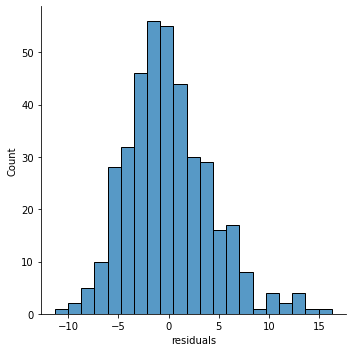

In [184]:
import seaborn as sns
sns.displot(autos['residuals'])

# R2
(Coefficient of determination)

# $r2 = 1 - \frac{\Sigma{(y_i -\hat{y_i})^2}}{\Sigma{(y_i - \bar{y})^2}}$

n = number of data points

y = true values

$\hat{y}$ = predicted values

$\bar{y}$ = mean value


> r2 = 1: Model explains all the variability of the response data around its mean. Precise predictions. \
> r2 = 0:  Model explains none of the variability of the response data around its mean. Predictions are not precise. 

In [156]:
sum_squared_error(autos['mpg'], autos['y_preds'])

6980.025761923855

In [157]:
#manually calculated
def r2(true, preds):
    numerator = sum_squared_error(true, preds)
    true_mean = true.mean()
    residual_list = []
    for i in true:
        residual_list.append((i - true_mean)**2)
    denominator = sum(residual_list)
    return 1 - numerator/denominator
    

#sklearn 
print("correct:", metrics.r2_score(autos['mpg'], autos['y_preds']))

r2(autos['mpg'], autos['y_preds'])

correct: 0.7069554693444708


0.7069554693444706

Usefulness:
- Easy to interpret: "An R2 of 0.8 means that 80% of the variability in the data are explained by our model, relative to a model with no predictors." 
- Measure as close to 1 as possible. 
- Does not depend on the scale of y. 
- Measurement goes beyond just linear regression. 

Drawback:
- Influenced by additional variables (use adj_r2 to penalize additional features). 

# Bias and Variance

# Extras 

# Regress Exog 

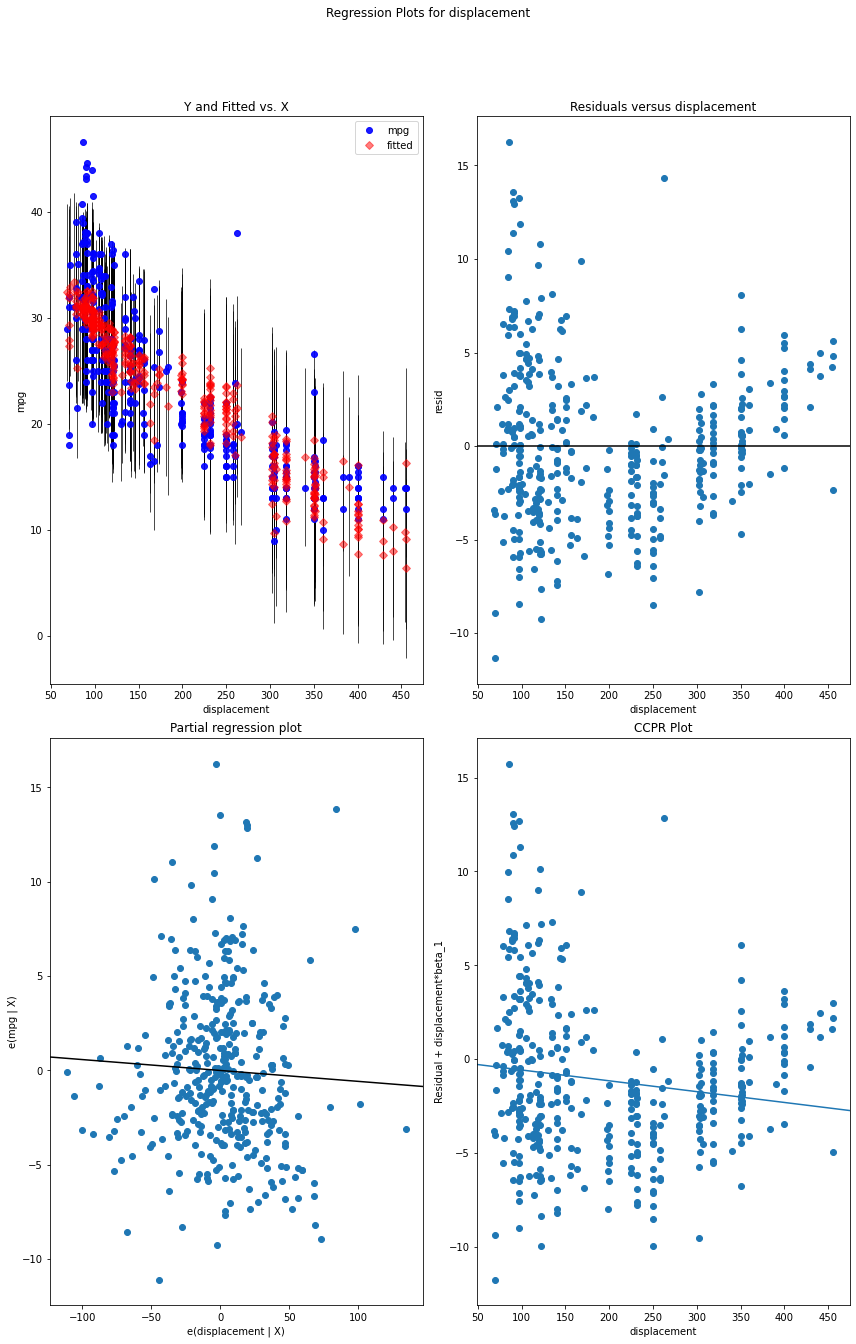

In [147]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12, 19))
fig = sm.graphics.plot_regress_exog(model, 'displacement', fig = fig)

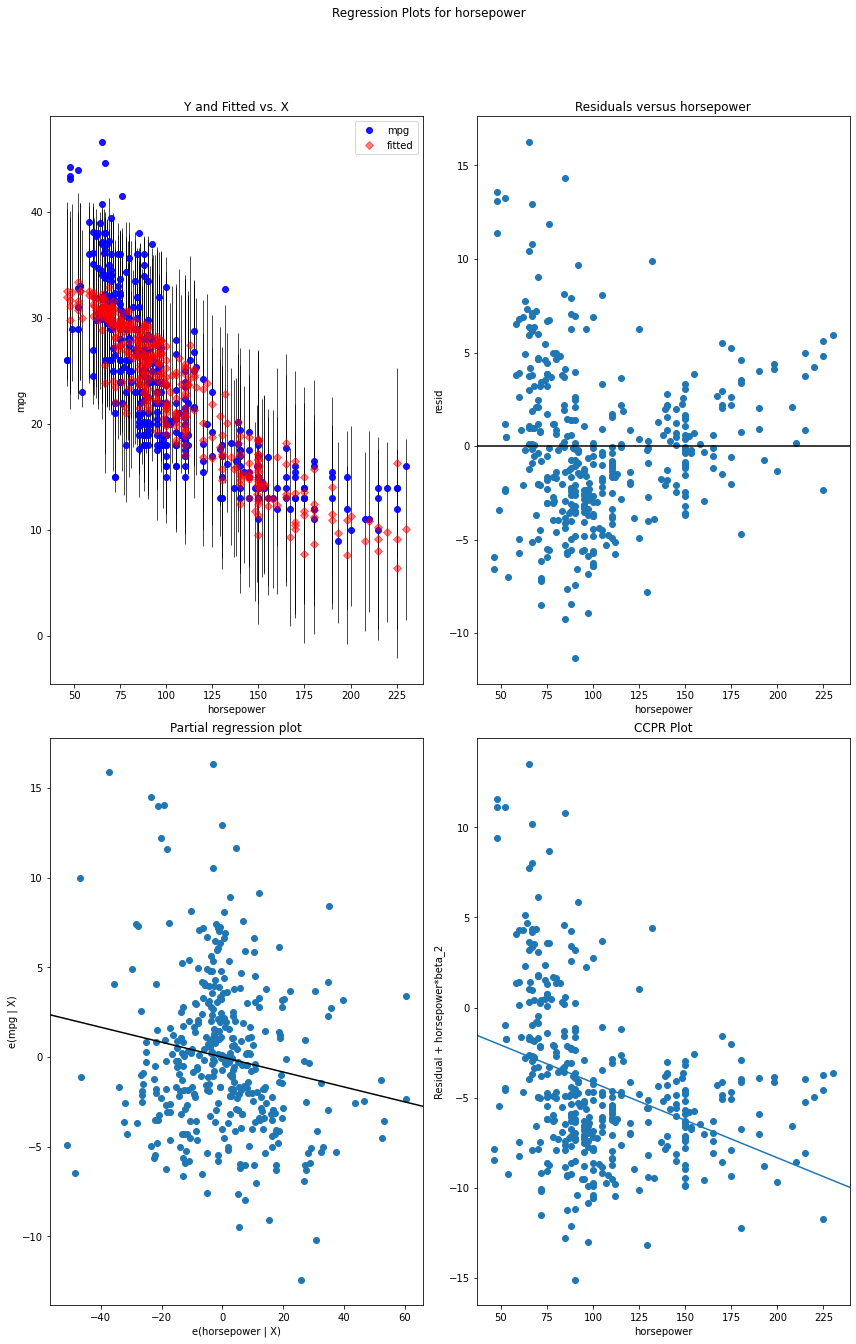

In [148]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12, 19))
fig = sm.graphics.plot_regress_exog(model, 'horsepower', fig = fig)

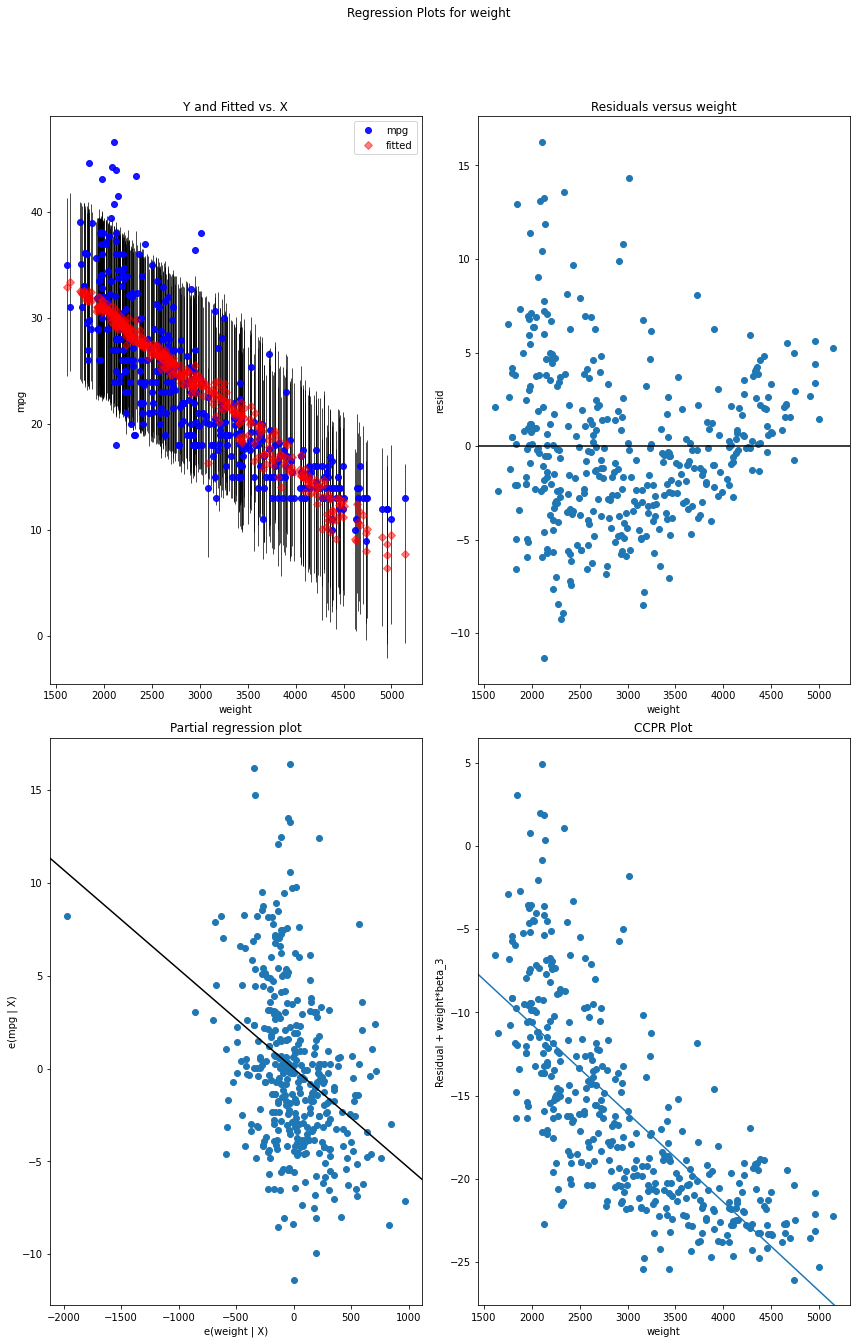

In [149]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12, 19))
fig = sm.graphics.plot_regress_exog(model, 'weight', fig = fig)